 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [302]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [303]:
# Reading whale returns
csv_path = Path('resources/whale_returns.csv')
whale_data = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_data.head(10)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [304]:
# Count nulls
whale_data.isnull().sum() 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [305]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [306]:
# Reading algorithmic returns
csv_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_data.head(10)



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [307]:
# Count nullsal
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [308]:
# Drop null
algo_data.dropna(inplace=True)
algo_data.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [309]:
# Reading S&P 500 Closing Prices
csv_path = Path("Resources/sp500_history.csv")
sp_data = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_data.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [310]:
# Check Data Types
sp_data.dtypes

Close    object
dtype: object

In [311]:
# Fix Data Types
sp_data['Close'] = sp_data['Close'].str.replace("$", "")
sp_data.head()
sp_data['Close'] = sp_data['Close'].astype(float)

In [312]:
sp_data.dtypes

Close    float64
dtype: object

In [313]:
# Calculate Daily Returns
daily_returns = sp_data.pct_change()


In [314]:
# Drop nulls.isnull()
daily_returns.dropna(inplace=True)

In [315]:
# Rename Column name
daily_returns = daily_returns.rename(columns={'Close':'sp_500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [316]:
sp_data = daily_returns

In [317]:
daily_returns.head()

,sp_500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [318]:
algo_data.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


In [319]:
# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([whale_data, algo_data, sp_data],axis="columns", join="inner")
combined_data.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

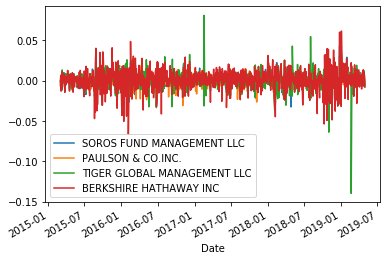

In [320]:
# Plot daily returns
whale_data.plot()

In [321]:
whale_cumulative = (1 + whale_data).cumprod()
whale_cumulative.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534
2015-03-10,0.987379,0.997595,0.984595,0.979897
2015-03-11,0.991340,1.002746,0.987855,0.978774
2015-03-12,0.999533,1.013045,1.000813,0.989346
2015-03-13,0.997037,1.011598,0.997113,0.981290


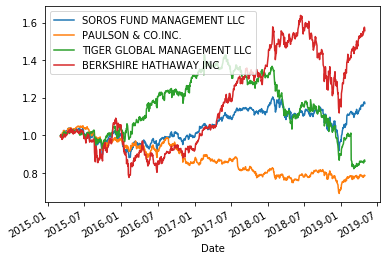

In [322]:
whale_cumulative.plot()

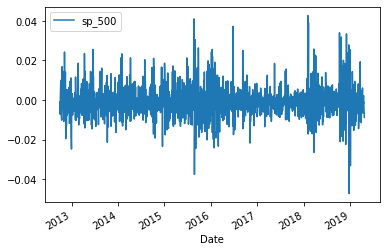

In [323]:
sp_data.plot()

In [324]:
# Plot cumulative returns
sp_cumulative = (1 + sp_data).cumprod()
sp_cumulative.head(10)

,sp_500
Date,
2019-04-22,0.991236
2019-04-18,0.990234
2019-04-17,0.988673
2019-04-16,0.990926
2019-04-15,0.990422
2019-04-12,0.991045
2019-04-11,0.984538
2019-04-10,0.984501
2019-04-09,0.981089


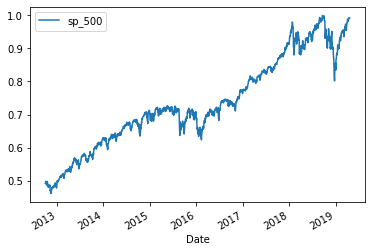

In [325]:
# Plot cumulative returns
sp_cumulative.plot()

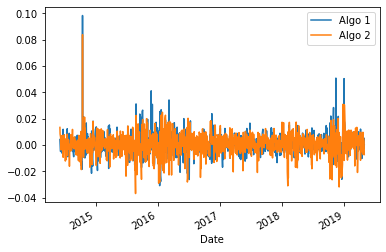

In [326]:
algo_data.plot()

In [327]:
# Plot cumulative returns
algo_cumulative = (1 + algo_data).cumprod()
algo_cumulative.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852
2014-06-12,1.010052,1.018923
2014-06-13,1.011989,1.018094
2014-06-16,1.013086,1.019958
2014-06-17,1.014020,1.026964


In [328]:
## Risk

#Determine the _risk_ of each portfolio:

#1. Create a box plot for each portfolio. 
#2. Calculate the standard deviation for all portfolios
#4. Determine which portfolios are riskier than the S&P 500
#5. Calculate the Annualized Standard Deviation

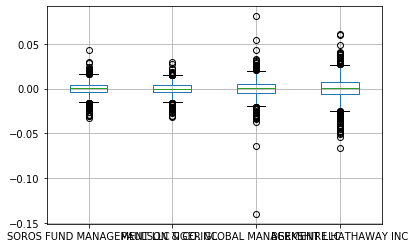

In [329]:
whale_data.boxplot()

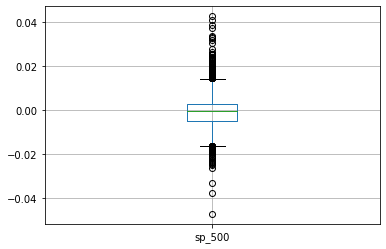

In [330]:
sp_data.boxplot()

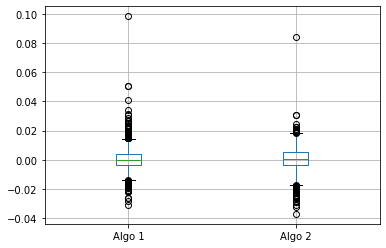

In [331]:
algo_data.boxplot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [332]:
whale_stan = whale_data.std()
whale_stan.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [333]:
sp_stan = sp_data.std()
sp_stan.head()

sp_500    0.008135
dtype: float64

In [334]:
algo_stan = algo_data.std()
algo_stan.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [335]:
#Annualized Std for each (Whale-252)

whale_annual_std = whale_stan * np.sqrt(252)
whale_annual_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [336]:
#Annualized Std for each (SP-252)

sp_annual_std = sp_stan * np.sqrt(252)
sp_annual_std.head()

sp_500    0.129133
dtype: float64

In [337]:
#Annualized Std for each (ALGO-252)

algo_annual_std = algo_stan * np.sqrt(252)
algo_annual_std.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

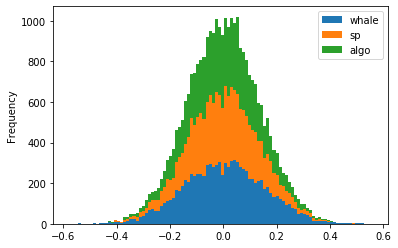

In [338]:
# Which portfolios are riskier than the S&P 500?
whale_annual_std = np.random.normal(scale=whale_annual_std.mean(), size=10000)
sp_annual_std = np.random.normal(scale=sp_annual_std, size=10000)
algo_annual_std = np.random.normal(scale=algo_annual_std.mean(), size=10000)

portfolio_std = pd.DataFrame({
    "whale": whale_annual_std,
    "sp": sp_annual_std,
    "algo": algo_annual_std
})

portfolio_std.plot.hist(stacked=True, bins=100)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

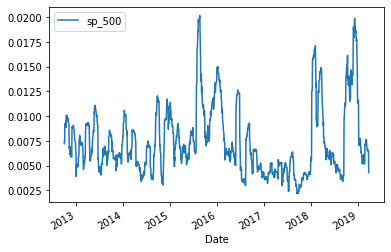

In [339]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp_roll_std = sp_data.rolling(window=21).std()
sp_roll_std.plot()

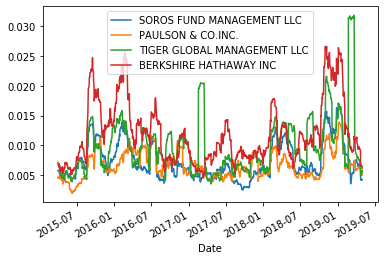

In [340]:
whale_roll_std = whale_data.rolling(window=21).std()
whale_roll_std.plot()

In [341]:
# Construct a correlation table
port_correlation = pd.concat([sp_roll_std, whale_roll_std], axis='columns', join='inner').corr()
print(port_correlation)

                               sp_500  SOROS FUND MANAGEMENT LLC  \
sp_500                       1.000000                   0.425798   
SOROS FUND MANAGEMENT LLC    0.425798                   1.000000   
PAULSON & CO.INC.            0.112490                   0.663920   
TIGER GLOBAL MANAGEMENT LLC  0.159542                   0.448614   
BERKSHIRE HATHAWAY INC       0.426660                   0.856068   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
sp_500                                 0.112490                     0.159542   
SOROS FUND MANAGEMENT LLC              0.663920                     0.448614   
PAULSON & CO.INC.                      1.000000                     0.405619   
TIGER GLOBAL MANAGEMENT LLC            0.405619                     1.000000   
BERKSHIRE HATHAWAY INC                 0.629226                     0.409550   

                             BERKSHIRE HATHAWAY INC  
sp_500                                     0.426660  
SO

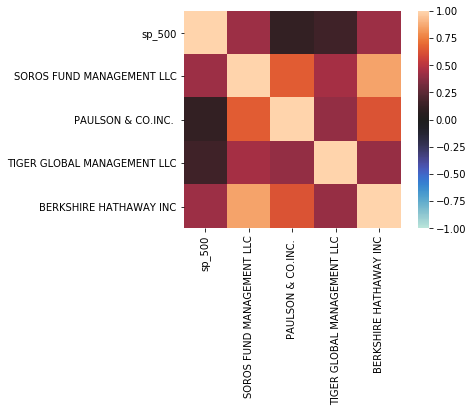

In [343]:
ax=sns.heatmap(port_correlation, vmin=-1, vmax=1, center=0, square=True)

In [ ]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

In [ ]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [ ]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Read the first stock
# YOUR CODE HERE

In [ ]:
# Read the second stock
# YOUR CODE HERE

In [ ]:
# Read the third stock
# YOUR CODE HERE

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE